# Library Imports

In [1]:
import os
import sys
import skimage 
import numpy as np
import matplotlib.pyplot as plt
from pygcode import *
from skimage import measure
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from PIL import Image

# Import PNG file

In [2]:
class Contour:
    def __init__(self, start_row, start_col, end_row, end_col):
        self.start_row = start_row
        self.start_col = start_col
        self.end_row = end_row
        self.end_col = end_col
        
    def get_start(self):
        return self.start_row, self.start_col
    
    def get_end(self):
        return self.end_row, self.end_col
        
    def set_start(self, r, c):
        self.start_row = r
        self.start_col = c
    
    def set_end(self, r, c):
        self.end_row = r
        self.end_col = c

In [3]:
class Square:
    def __init__(self, top_left, contours):
        self.case = case
        self.top_left = top_left
        self.contours = contours

In [4]:
def import_image(path):
    file = os.path.join(path)
    img = ""
    try:
        img = io.imread(file)
    except:
        print("File not found")
    return img

In [5]:
image = import_image("Images/dog.jpg")

# Grayscale Image

In [6]:
def img_to_gray(original):
    grayscale = rgb2gray(original)
    fig, axes = plt.subplots(1, 1, figsize=(4, 4))

    axes.imshow(grayscale, cmap=plt.cm.gray)
    
    fig.tight_layout()
    return grayscale

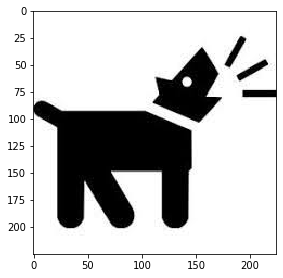

In [7]:
gray_img = img_to_gray(import_image("Images/dog.jpg"))

# Find Contours

In [8]:
def find_contours(image, accuracy):
    img = np.flipud(image)
    
    # Find contours at a constant value defined by parameter accuracy
    contours = measure.find_contours(img, accuracy)
    
    # Display the image and plot all contours found
    fig, ax = plt.subplots()

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

    ax.axis('image')
    plt.show()
    print(contours)
    return contours

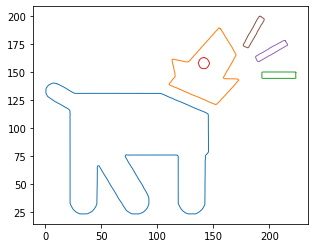

[array([[140.        ,  10.03787879],
       [139.52255639,  11.        ],
       [139.16358025,  12.        ],
       ...,
       [140.2755102 ,   9.        ],
       [140.01893939,  10.        ],
       [140.        ,  10.03787879]]), array([[189.        , 156.21296296],
       [188.17207792, 157.        ],
       [188.        , 157.1318408 ],
       [187.        , 157.55511811],
       [186.45145631, 158.        ],
       [186.        , 158.28181818],
       [185.0125    , 159.        ],
       [185.        , 159.00847458],
       [184.        , 159.49346405],
       [183.        , 159.98051948],
       [182.97826087, 160.        ],
       [182.        , 160.59734513],
       [181.45180723, 161.        ],
       [181.        , 161.27985075],
       [180.        , 161.93292683],
       [179.92253521, 162.        ],
       [179.        , 162.50384615],
       [178.26704545, 163.        ],
       [178.        , 163.188     ],
       [177.        , 163.68396226],
       [176.65816327, 1

6

In [9]:
contours = find_contours(gray_img, .3)
len(contours)

# Naive Approach

In [10]:
def naive_gcode(image, threshold):
    data = img_to_gray(import_image(image))
    
    num_rows = len(data)
    num_cols = len(data[0])
    print(num_rows)
    print(num_cols)
    
    lines = []
    cols = []
                
    for row in range(0, num_rows):
        cols = []
        border = True
        for col in range(0, num_cols): 
            if data[row][col] > threshold:
                if border == False:
                    cols.append(col - 1)
                    border = True
            elif data[row][col] < threshold and border == True:
                cols.append(col)
                border = False
            elif data[row][col] < threshold and col == num_cols-1:
                cols.append(col)
                border = False
        if len(cols) % 2 != 0:
            cols.append(cols[len(cols)-1])
        lines.append(cols)
    
    #Display coords
    i=0
    points = []
    for row in range(0, num_rows):
        for point in lines[i]:
            points.append([i, point])
        i += 1
    
    xs = []
    ys = []
    for coord in points:
        xs.append(coord[1])
        ys.append(coord[0])
    plt.scatter(xs, ys, s = 1)
    plt.show()
    
    lines.reverse()
    return lines

752
748


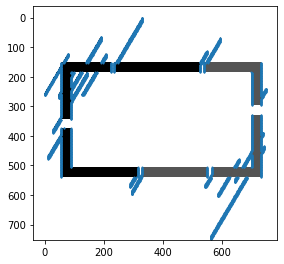

[[],
 [],
 [562, 562],
 [562, 562],
 [562, 563],
 [562, 564],
 [562, 564],
 [562, 565],
 [562, 565],
 [562, 566],
 [562, 567],
 [562, 567],
 [562, 568],
 [563, 568],
 [563, 569],
 [564, 570],
 [565, 570],
 [565, 571],
 [566, 571],
 [566, 572],
 [567, 573],
 [568, 573],
 [568, 574],
 [569, 574],
 [569, 575],
 [570, 575],
 [571, 576],
 [571, 577],
 [572, 577],
 [572, 578],
 [573, 578],
 [574, 579],
 [574, 580],
 [575, 580],
 [575, 581],
 [576, 581],
 [576, 582],
 [577, 583],
 [578, 583],
 [578, 584],
 [579, 584],
 [579, 585],
 [580, 586],
 [581, 586],
 [581, 587],
 [582, 587],
 [582, 588],
 [583, 589],
 [584, 589],
 [584, 590],
 [585, 590],
 [585, 591],
 [586, 591],
 [587, 592],
 [587, 593],
 [588, 593],
 [588, 594],
 [589, 594],
 [590, 595],
 [590, 596],
 [591, 596],
 [591, 597],
 [592, 597],
 [592, 598],
 [593, 599],
 [594, 599],
 [594, 600],
 [595, 600],
 [595, 601],
 [596, 602],
 [597, 602],
 [597, 603],
 [598, 603],
 [598, 604],
 [599, 605],
 [600, 605],
 [600, 606],
 [601, 606],
 [

In [11]:
naive_gcode("Images/gray_test.png", 0.7)

In [12]:
def naive_to_gcode(lines):
    all_instructions = []
    num_rows = len(lines)
    to_coords = lambda coords: {'X': coords[0], 'Y': coords[1]}
    i = 0
    for row in range(0, num_rows):
        for col in lines[row]:
            if i == 0:
                gcode = GCodeRapidMove(**to_coords([col, row]))
                print("%s" % gcode)
                i=1
            else:
                gcode = GCodeLinearMove(**to_coords([col, row]))
                print("%s" % gcode)
                i=0
            all_instructions.append(gcode)
    return all_instructions

752
748


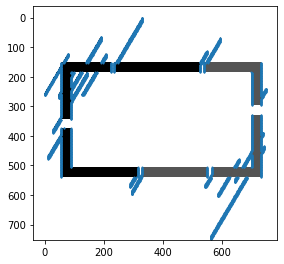

G00 X562 Y2
G01 X562 Y2
G00 X562 Y3
G01 X562 Y3
G00 X562 Y4
G01 X563 Y4
G00 X562 Y5
G01 X564 Y5
G00 X562 Y6
G01 X564 Y6
G00 X562 Y7
G01 X565 Y7
G00 X562 Y8
G01 X565 Y8
G00 X562 Y9
G01 X566 Y9
G00 X562 Y10
G01 X567 Y10
G00 X562 Y11
G01 X567 Y11
G00 X562 Y12
G01 X568 Y12
G00 X563 Y13
G01 X568 Y13
G00 X563 Y14
G01 X569 Y14
G00 X564 Y15
G01 X570 Y15
G00 X565 Y16
G01 X570 Y16
G00 X565 Y17
G01 X571 Y17
G00 X566 Y18
G01 X571 Y18
G00 X566 Y19
G01 X572 Y19
G00 X567 Y20
G01 X573 Y20
G00 X568 Y21
G01 X573 Y21
G00 X568 Y22
G01 X574 Y22
G00 X569 Y23
G01 X574 Y23
G00 X569 Y24
G01 X575 Y24
G00 X570 Y25
G01 X575 Y25
G00 X571 Y26
G01 X576 Y26
G00 X571 Y27
G01 X577 Y27
G00 X572 Y28
G01 X577 Y28
G00 X572 Y29
G01 X578 Y29
G00 X573 Y30
G01 X578 Y30
G00 X574 Y31
G01 X579 Y31
G00 X574 Y32
G01 X580 Y32
G00 X575 Y33
G01 X580 Y33
G00 X575 Y34
G01 X581 Y34
G00 X576 Y35
G01 X581 Y35
G00 X576 Y36
G01 X582 Y36
G00 X577 Y37
G01 X583 Y37
G00 X578 Y38
G01 X583 Y38
G00 X578 Y39
G01 X584 Y39
G00 X579 Y40
G01 X584 Y40
G0

G01 X130 Y533
G00 X151 Y533
G01 X157 Y533
G00 X700 Y533
G01 X731 Y533
G00 X24 Y534
G01 X27 Y534
G00 X57 Y534
G01 X89 Y534
G00 X102 Y534
G01 X108 Y534
G00 X125 Y534
G01 X131 Y534
G00 X152 Y534
G01 X158 Y534
G00 X700 Y534
G01 X731 Y534
G00 X25 Y535
G01 X28 Y535
G00 X57 Y535
G01 X89 Y535
G00 X102 Y535
G01 X108 Y535
G00 X126 Y535
G01 X132 Y535
G00 X153 Y535
G01 X159 Y535
G00 X700 Y535
G01 X731 Y535
G00 X26 Y536
G01 X28 Y536
G00 X57 Y536
G01 X89 Y536
G00 X103 Y536
G01 X109 Y536
G00 X126 Y536
G01 X132 Y536
G00 X153 Y536
G01 X159 Y536
G00 X700 Y536
G01 X731 Y536
G00 X26 Y537
G01 X29 Y537
G00 X57 Y537
G01 X89 Y537
G00 X103 Y537
G01 X109 Y537
G00 X127 Y537
G01 X133 Y537
G00 X154 Y537
G01 X160 Y537
G00 X700 Y537
G01 X731 Y537
G00 X27 Y538
G01 X30 Y538
G00 X57 Y538
G01 X89 Y538
G00 X104 Y538
G01 X110 Y538
G00 X127 Y538
G01 X133 Y538
G00 X154 Y538
G01 X160 Y538
G00 X700 Y538
G01 X731 Y538
G00 X27 Y539
G01 X30 Y539
G00 X57 Y539
G01 X89 Y539
G00 X105 Y539
G01 X111 Y539
G00 X128 Y539
G01 X134 Y539
G0

[<GCodeRapidMove: G00{X562, Y2}>,
 <GCodeLinearMove: G01{X562, Y2}>,
 <GCodeRapidMove: G00{X562, Y3}>,
 <GCodeLinearMove: G01{X562, Y3}>,
 <GCodeRapidMove: G00{X562, Y4}>,
 <GCodeLinearMove: G01{X563, Y4}>,
 <GCodeRapidMove: G00{X562, Y5}>,
 <GCodeLinearMove: G01{X564, Y5}>,
 <GCodeRapidMove: G00{X562, Y6}>,
 <GCodeLinearMove: G01{X564, Y6}>,
 <GCodeRapidMove: G00{X562, Y7}>,
 <GCodeLinearMove: G01{X565, Y7}>,
 <GCodeRapidMove: G00{X562, Y8}>,
 <GCodeLinearMove: G01{X565, Y8}>,
 <GCodeRapidMove: G00{X562, Y9}>,
 <GCodeLinearMove: G01{X566, Y9}>,
 <GCodeRapidMove: G00{X562, Y10}>,
 <GCodeLinearMove: G01{X567, Y10}>,
 <GCodeRapidMove: G00{X562, Y11}>,
 <GCodeLinearMove: G01{X567, Y11}>,
 <GCodeRapidMove: G00{X562, Y12}>,
 <GCodeLinearMove: G01{X568, Y12}>,
 <GCodeRapidMove: G00{X563, Y13}>,
 <GCodeLinearMove: G01{X568, Y13}>,
 <GCodeRapidMove: G00{X563, Y14}>,
 <GCodeLinearMove: G01{X569, Y14}>,
 <GCodeRapidMove: G00{X564, Y15}>,
 <GCodeLinearMove: G01{X570, Y15}>,
 <GCodeRapidMove: G00{

In [13]:
naive_to_gcode(naive_gcode("Images/gray_test.png", 0.7))

# Marching Squares

In [14]:
def get_reference_squares(filename, threshold, increment):
    data = img_to_gray(import_image(filename))
    references = []
    num_rows = len(data)
    num_cols = len(data[0])
    important_squares = []
    print(str(num_rows) + "x" + str(num_cols))
    for row in range(0, num_rows, increment):
        for col in range(0, num_cols, increment):
            if data[row][col] < threshold:
                important_squares.append([row, col])
    plt.imshow(data, cmap="gray")
    plt.show()
    return important_squares

225x225


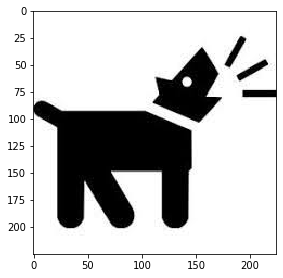

[[25, 190],
 [30, 190],
 [35, 155],
 [35, 185],
 [35, 190],
 [40, 150],
 [40, 155],
 [40, 185],
 [45, 145],
 [45, 150],
 [45, 155],
 [45, 160],
 [45, 180],
 [45, 185],
 [50, 145],
 [50, 150],
 [50, 155],
 [50, 160],
 [50, 165],
 [50, 180],
 [50, 205],
 [50, 210],
 [50, 215],
 [55, 140],
 [55, 145],
 [55, 150],
 [55, 155],
 [55, 160],
 [55, 165],
 [55, 200],
 [55, 205],
 [60, 135],
 [60, 140],
 [60, 145],
 [60, 150],
 [60, 155],
 [60, 160],
 [60, 165],
 [60, 190],
 [60, 195],
 [65, 115],
 [65, 120],
 [65, 125],
 [65, 130],
 [65, 135],
 [65, 150],
 [65, 155],
 [65, 160],
 [65, 165],
 [70, 115],
 [70, 120],
 [70, 125],
 [70, 130],
 [70, 135],
 [70, 145],
 [70, 150],
 [70, 155],
 [70, 160],
 [75, 120],
 [75, 125],
 [75, 130],
 [75, 135],
 [75, 140],
 [75, 145],
 [75, 150],
 [75, 155],
 [75, 160],
 [75, 195],
 [75, 200],
 [75, 205],
 [75, 210],
 [75, 215],
 [75, 220],
 [80, 115],
 [80, 120],
 [80, 125],
 [80, 130],
 [80, 135],
 [80, 140],
 [80, 145],
 [80, 150],
 [80, 155],
 [80, 160],
 [80

In [15]:
get_reference_squares("Images/dog.jpg", .5, 5)

In [16]:
def get_case(x):
    return {
        str([0,0,0,0]): 0,
        str([0,0,1,0]): 1,
        str([0,0,0,1]): 2,
        str([0,0,1,1]): 3,
        str([0,1,0,0]): 4,
        str([0,1,1,0]): 5,
        str([0,1,0,1]): 6,
        str([0,1,1,1]): 7,
        str([1,0,0,0]): 8,
        str([1,0,1,0]): 9,
        str([1,0,0,1]): 10,
        str([1,0,1,1]): 11,
        str([1,1,0,0]): 12,
        str([1,1,1,0]): 13,
        str([1,1,0,1]): 14,
        str([1,1,1,1]): 15,
    }.get(x, 16)

In [17]:
get_case(str([0,0,0,0]))

0

In [65]:
def check_corner(data, row, col, threshold):
    corner = 0
    if data[row][col] > threshold:
        corner = 1
    else:
        corner = 0
    return corner

In [66]:
def check_case(data, row_num, col_num, increment, threshold):
    corners = []
    for row, col in [(row_num+i,col_num+j) for i in (0,increment) for j in (0,increment)]:
        if row < len(data) and col < len(data[0]):
            corners.append(check_corner(data, row, col, threshold))
        elif row > len(data):
            row = len(data)-1
            corners.append(check_corner(data, row, col, threshold))
        elif col > len(data[0]):
            col = len(data[0])-1
            corners.append(check_corner(data, row, col, threshold))
    return get_case(str(corners))

In [71]:
def check_square(row_num, col_num, data, increment, threshold):
    corners = []
    contours = []
    case = 0
    for row, col in [(row_num+i,col_num+j) for i in (0,increment) for j in (0,increment)]:
        try:
            #This is for adjacent squares in bounds
            if data[row][col] > threshold:
                interpolant = np.round((data[row_num][col_num]/data[row][col])*increment)
                if row > row_num:
                    contours.append([row_num + interpolant, col_num])
                elif row < row_num:
                    contours.append([row_num - interpolant, col_num])
                elif col > col_num:
                    contours.append([row_num, col_num + interpolant])
                elif col < col_num:
                    contours.append([row_num, col_num - interpolant])
                else:
                    print("Something went wrong")
        except IndexError:
             #This is for if the adjacent square is out of bounds
            print(row)
            print(col)
            contours.append([row, col])
            print("This cell is out of bounds")
            print("Don't worry this may happen, but needs to be dealt with.")
            print("-"*40)
        except ZeroDivisionError:
             #This is for if the adjacent square is Pure black
            print(row)
            print(col)
            print("This SHOULD never happen")
            print("-"*40)
        except:
            #This is to catch any other error
            print("Unexpected error:", sys.exc_info()[0])
            print("-"*40)
        case = get_case(str(corners))
        res = [] 
        for i in contours:
            if i not in res:
                res.append(i)
    return res

In [72]:
print(check_square(25, 190, gray_img, 5, 0.5))
check_case(gray_img, 25, 190, 5, 0.5)

[[25, 194.0], [27.0, 190]]


6

In [92]:
def get_ms_contours(filename, threshold, increment, marker_size):
    refrences = get_reference_squares(filename, threshold, increment)
    x = []
    y = []
    data = img_to_gray(import_image(filename))
    squares = []
    contours = []
    for coord in refrences:
        contours.append([check_case(data, coord[0], coord[1], increment, threshold), check_square(coord[0], coord[1], data, increment, threshold)])
    for contour in contours:
        case = contour[0]
        coords = contour[1]
        for coord in coords:
            x.append(coord[1])
            y.append(coord[0])
    plt.scatter(x, y, s = marker_size)
    return contours

752x748


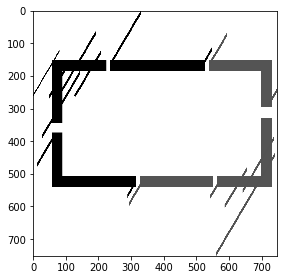

245
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------
250
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------
250
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------
255
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------
255
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------
260
750
This cell is out of bounds
Don't worry this may happen, but needs to be dealt with.
----------------------------------------


[[6, [[5, 332.0], [7.0, 330]]],
 [2, [[13.0, 325]]],
 [7, [[10, 332.0], [12.0, 330]]],
 [6, [[15, 327.0], [17.0, 325]]],
 [2, [[22.0, 320]]],
 [7, [[20, 327.0], [22.0, 325]]],
 [6, [[25, 322.0], [27.0, 320]]],
 [2, [[32.0, 315]]],
 [7, [[30, 323.0], [33.0, 320]]],
 [7, [[35, 317.0], [37.0, 315]]],
 [6, [[40, 312.0], [42.0, 310]]],
 [2, [[47.0, 305]]],
 [7, [[45, 312.0], [47.0, 310]]],
 [6, [[50, 307.0], [52.0, 305]]],
 [2, [[57.0, 300]]],
 [7, [[55, 308.0], [58.0, 305]]],
 [7, [[60, 302.0], [62.0, 300]]],
 [6, [[65, 297.0], [67.0, 295]]],
 [6, [[70, 192.0], [72.0, 190]]],
 [2, [[72.0, 290]]],
 [7, [[70, 297.0], [72.0, 295]]],
 [7, [[75, 192.0], [77.0, 190]]],
 [6, [[75, 292.0], [77.0, 290]]],
 [6, [[80, 187.0], [82.0, 185]]],
 [2, [[82.0, 285]]],
 [7, [[80, 292.0], [82.0, 290]]],
 [6, [[80, 593.0], [83.0, 590]]],
 [2, [[87.0, 180]]],
 [7, [[85, 187.0], [87.0, 185]]],
 [7, [[85, 287.0], [87.0, 285]]],
 [2, [[88.0, 585]]],
 [7, [[85, 593.0], [88.0, 590]]],
 [6, [[90, 182.0], [92.0, 180]]

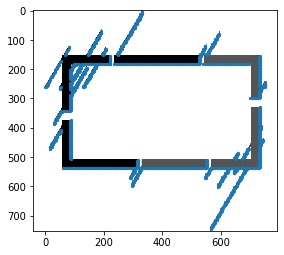

In [94]:
get_ms_contours("Images/gray_test.png", .7, 5, 5)

# Define GCODE

In [ ]:
def get_GCode(contours):
    i = 0
    all_instructions = []
    to_coords = lambda coords: {'X': coords[1], 'Y': coords[0]}
    for coords in contours:
        if i == 0:
            gcode = GCodeRapidMove(**to_coords(coords))
            print("%s" % gcode)
            i=1
        else:
            gcode = GCodeLinearMove(**to_coords(coords))
            print("%s" % gcode)
            i=0
        all_instructions.append(gcode)
        print("-" * 40)
    return all_instructions

In [ ]:
gcodes = get_GCode(get_ms_contours("Images/gray_test.png", .7, 5, 1))

# Output GCODE to file

In [ ]:
def output_gcode(all_instructions, filename):
    File_object = open(filename,"w")
    for gcode in all_instructions:
        print(gcode)
        File_object.write(str(gcode) + ";\n")
    File_object.close()

In [ ]:
output_gcode(naive_to_gcode(naive_gcode("Images/smile.png", 0.7)), "output2.gcode")

In [ ]:
output_gcode(get_GCode(get_ms_contours("Images/gray_test.png", .7, 5, 1)), "output4.gcode")